# Big Data Processes - exercise no. 7
# <font color= green>Classification</font>

## 1. <font color= orange>Importing various libraries</font>

In [1]:
# Pandas to interpret data frames
import pandas as pd 

# libraries to visualize
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn as one of the most used machine learning package
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


## 2. <font color= orange>Load and process the dataset</font>

In [2]:
path = 'Data/Auto.csv'
df = pd.read_csv(path, sep=';',encoding='utf-8', header = 0)

In [3]:
df.head()

,obsNo,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18,8,307,130,3504,12,70,1,chevrolet chevelle malibu
1,2,15,8,350,165,3693,"11,5",70,1,buick skylark 320
2,3,18,8,318,150,3436,11,70,1,plymouth satellite
3,4,16,8,304,150,3433,12,70,1,amc rebel sst
4,5,17,8,302,140,3449,"10,5",70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   obsNo         392 non-null    int64 
 1   mpg           392 non-null    object
 2   cylinders     392 non-null    int64 
 3   displacement  392 non-null    object
 4   horsepower    392 non-null    int64 
 5   weight        392 non-null    int64 
 6   acceleration  392 non-null    object
 7   year          392 non-null    int64 
 8   origin        392 non-null    int64 
 9   name          392 non-null    object
dtypes: int64(6), object(4)
memory usage: 30.8+ KB


In [5]:
df['mpg'].values

array(['18', '15', '18', '16', '17', '15', '14', '14', '14', '15', '15',
       '14', '15', '14', '24', '22', '18', '21', '27', '26', '25', '24',
       '25', '26', '21', '10', '10', '11', '9', '27', '28', '25', '19',
       '16', '17', '19', '18', '14', '14', '14', '14', '12', '13', '13',
       '18', '22', '19', '18', '23', '28', '30', '30', '31', '35', '27',
       '26', '24', '25', '23', '20', '21', '13', '14', '15', '14', '17',
       '11', '13', '12', '13', '19', '15', '13', '13', '14', '18', '22',
       '21', '26', '22', '28', '23', '28', '27', '13', '14', '13', '14',
       '15', '12', '13', '13', '14', '13', '12', '13', '18', '16', '18',
       '18', '23', '26', '11', '12', '13', '12', '18', '20', '21', '22',
       '18', '19', '21', '26', '15', '16', '29', '24', '20', '19', '15',
       '24', '20', '11', '20', '19', '15', '31', '26', '32', '25', '16',
       '16', '18', '16', '13', '14', '14', '14', '29', '26', '26', '31',
       '32', '28', '24', '26', '24', '26', '31', '19

In [6]:
df['mpg'] = df['mpg'].str.replace(',','.').astype('float')
df['acceleration'] = df['acceleration'].str.replace(',','.').astype('float')
df['displacement'] = df['displacement'].str.replace(',','.').astype('float')

In [7]:
df.describe()

,obsNo,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,198.520408,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,114.438067,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,1.000000,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,99.750000,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,198.500000,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,296.250000,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,397.000000,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
df['mpg_binary'] = (df['mpg'] >= df['mpg'].median()).astype(int)
df.head(20)

,obsNo,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_binary
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
5,6,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,0
6,7,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,0
7,8,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,0
8,9,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,0
9,10,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,0


Finally, we need to specify what our features are, and what the target is. We simply split our data into:
- target, response, outcome or dependent variable **(y)**
- feature, explanatory, covariate or independent variable **(X)**

In [9]:
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg_binary'].values

## 3. <font color= orange>Simple Logistic Regression</font> by Sklearn

Creating models with these advance tools is fairly simple. We simply call some methods and functions, and the underlying algoritms do the job. **However, it does not mean we do not need to understand those algorithms!** It only means that instead of re-inventing the wheel time and again, we can concentrate on our own data-mining task.
This makes the process easy and swift. **Nonetheless, we must firmly rely on the documentation to know what each function expects and how to use them.**

In [ ]:
# first, create an object of the LinearRegressio() class
model_logReg_sklearn = LogisticRegression()

In [ ]:
# a visual to showcase our data
plt.scatter('horsepower', 'mpg_binary', data = df)

In [ ]:
# then apply the .fit() method on the object
model_logReg_sklearn.fit(X,y)

### Model's accuracy

The accuracy is showcasing the number of classifications a model correctly predicts divided by the total number of predictions made.

In [ ]:
# measure the accuracy if the fit and print it
accuracy = round(model_logReg_sklearn.score(X,y),4)

print("The model's mean accuracy for the data is: ", accuracy )

### Confusion matrix

A more visual and quantitative way of interpreting correct predictions

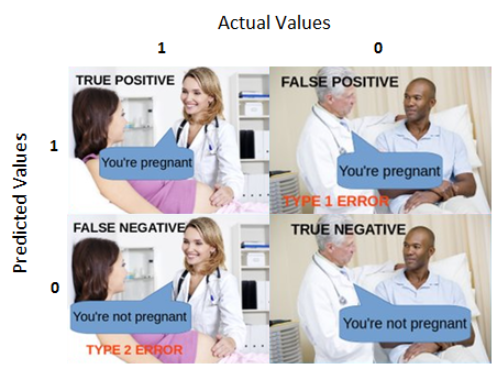

In [ ]:
#creating a prediction sample with our model
prediction = model_logReg_sklearn.predict(X)
prediction

In [ ]:
#seeing how many predictions were correct in the confusion matrix
confusion_matrix(y, prediction)

<b> However, the confusion matrix that Sklearn outputs doesn't have the classical configuration, so what you are getting is: </b>

![image](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg)   

There is another way to visualize how well the model performs when it comes to sensitivity and specificity: using the **ROC** and **AUC**

In [ ]:
#based on our model, we are creating prediction probability metrics
y_predicted = model_logReg_sklearn.predict_proba(X)[::,1]

In [ ]:
y_predicted

### Receiver operating characteristic curve (ROC)

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y,  y_predicted)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Area under the curve (AUC)

In [ ]:
auc = metrics.roc_auc_score(y, y_predicted)
print(auc)

## 4. <font color= orange>kNN</font> by Sklearn

<b> Two quick facts about kNN </b> 

- kNN classifies x based on most probable class. Most probable is based on most common (see picture below).
- One essential decision to make when constructing a kNN classifier is to choose the number of k neigbours.

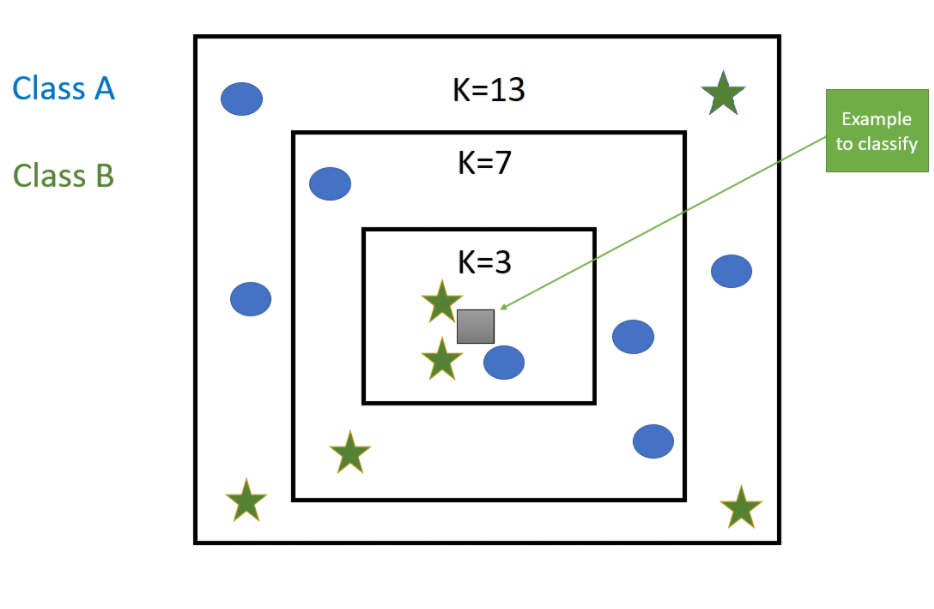

In [ ]:
#that is why we need 2 numeric dimensions and binary dimension used as a classifier
X = df[["horsepower", "weight"]].values
y = df["mpg_binary"].values

In [ ]:
#a visual of hour data
plt.figure(figsize=(10,6))
sns.scatterplot(x= df['horsepower'], y= df['weight'], hue = df['mpg_binary'], data = df)

In [ ]:
#calling the kNN classifier
model_knn_1 = KNeighborsClassifier()

In [ ]:
#splitting our data into train an test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

Ask yourself again, why would we split into train and test samples?

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors=3)

In [ ]:
model_KNN.fit(X_train,y_train)

In [ ]:
accuracy_test = round(model_KNN.score(X_test,y_test),4)
accuracy_test

In [ ]:
y_pred = model_KNN.predict(X)
cf_matrix = confusion_matrix(y, y_pred)
print(cf_matrix)

In [ ]:
#A lot of effort for a simple visual
import numpy as np
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [ ]:
pip install mlxtend

In [ ]:
from mlxtend.plotting import plot_decision_regions

def knn_comparison(data, k):
# Plotting decision region
    plt.figure(figsize=(10,8))
    plot_decision_regions(X, y, clf=model_KNN, legend=2)
# Adding axes annotations
    plt.xlabel('horsepower')
    plt.ylabel('weight')
    plt.title('Knn with K='+ str(k))
    plt.show()

In [ ]:
knn_comparison(df, 3)

## 5. <font color = orange>Exercises</font>

Remember, you could use your jupyter notebook files as notebooks. When you are working with your dataset you would want to document all of the decisions you make. Luckily, all of your decisions are emboddied in the code but it might be difficult to remember all of them. 

<b>E1:</b> Go around this notebook file and <b>double click</b> on the colorful headers or any cells that contain text. Try to create a perspective of how <b>markdown</b> is used, watch a <a href="https://www.youtube.com/watch?v=6A5EpqqDOdk">video</a> or you can use HTML instead. Whatever suits you better.

<b>E2:</b> Examine your dataset, are there any binary classifications? Do you think you can make some, like we did in this notebook? 

<b>E3:</b> If you were successful with E2, can you make logistical regression model by picking relevant variables or features?

<b>E4</b>: If you were successful with E2, can you make a **kNN** model with relevant variables or features? Additionally, how could you find the **k** that has the best accuracy score?